# Problem set ztp370 - AppStat 2022/2023




### Author: 
- Eric Steen Ravn Bowman

### Date:    
- 03-01-2023 

***

As always we will include a collection of libraries (Standard)

In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp

In [2]:
r = np.random
r.seed(42)

## 3 - Simulation / Monte Carlo
3.1 -  $f(x) = C\cdot x^a\cdot sin(\pi x)$ for $x\in[0,1]$ and $a=3$.
 

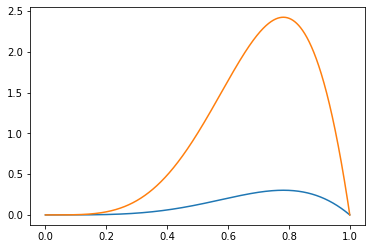

In [3]:
Npoints = 10000
Nbins = 100
linspace = np.linspace(0,1,Npoints)
def f(x,C=1,a=3):
    return C*x**a*np.sin(np.pi*x)
plt.plot(linspace,f(linspace))

plt.plot(linspace,f(linspace,np.pi**3/(np.pi**2-6)))

In [4]:
# Which method(s) would I use to generate numbers according to the function?
# I since there are particalur limits then I will try to use the accept reject method

xmin, xmax = 0, 1
ymin, ymax = 0, 2.5

In [5]:
f = np.zeros(Npoints)
Ntry=0
for i in range(Npoints):
    while True:
        Ntry += 1
        x = r.uniform(xmin, xmax)  
        y = r.uniform(ymin, ymax)        
        if (y < np.pi**3/(np.pi**2-6)*x**3*np.sin(np.pi*x)) :   # If the (x,y)-point fulfills the accept condition...
            break 
    f[i] = x

In [6]:
eff = Npoints/Ntry
print(f'The efficiency of the simulation is {eff:.4f}')
eff_error = np.sqrt((eff * (1-eff)) / Ntry)    # Error on efficiency (binomial)
print(f'The error on the efficiency is {eff_error:.3f}')


The efficiency of the simulation is 0.3983
The error on the efficiency is 0.003


In [7]:
# Update python to 3.8.5 
# Update numpy to 1.19.1
# !conda upgrade sympy